<h3>Importing Libraries</h3>

In [286]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

<h3>Import Data </h3>

In [287]:
#EDA
matches = pd.read_csv('C:\\Users\\admen\Desktop\matches.csv')
deliveries = pd.read_csv('C:\\Users\\admen\Desktop\deliveries.csv')

In [288]:
#Top 15 rows
matches.head(15)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [289]:
#Top 15 rows
deliveries.head(15)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN


In [290]:
#to know the rows and columns 
matches.shape

(756, 18)

In [291]:
#to know the rows and columns 
deliveries.shape

(179078, 21)

In [292]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [293]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [294]:
#Players of the match
matches['player_of_match'].value_counts()

CH Gayle          21
AB de Villiers    20
DA Warner         17
RG Sharma         17
MS Dhoni          17
                  ..
RE Levi            1
SA Asnodkar        1
RS Bopara          1
Shoaib Akhtar      1
CRD Fernando       1
Name: player_of_match, Length: 226, dtype: int64

In [295]:
#Top 10 player 
matches['player_of_match'].value_counts()[0:10]

CH Gayle          21
AB de Villiers    20
DA Warner         17
RG Sharma         17
MS Dhoni          17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

In [296]:
#EDA
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [297]:
#handling missing value
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [298]:
batsman = deliveries.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name="runs")

In [299]:
#batsman who score most run
top_batsman = batsman.sort_values(by='runs', ascending=False)[:10]
top_batsman

,batsman,runs
486,V Kohli,5434
428,SK Raina,5415
367,RG Sharma,4914
112,DA Warner,4741
392,S Dhawan,4632
92,CH Gayle,4560
290,MS Dhoni,4477
384,RV Uthappa,4446
26,AB de Villiers,4428
147,G Gambhir,4223


Text(0.5, 1.0, 'Top 10 Batsman in IPL')

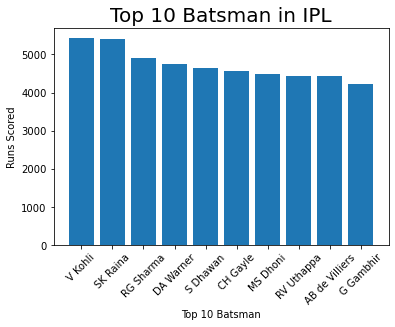

In [300]:
#visualization of data (Bar Chart)
plt.bar(top_batsman['batsman'], top_batsman['runs'])
plt.xticks(rotation=45)
plt.xlabel('Top 10 Batsman',size=10)
plt.ylabel('Runs Scored',size=10)
plt.title('Top 10 Batsman in IPL',size=20)

In [301]:
matches['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [302]:
matches['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [304]:
batting_first = matches[matches['win_by_runs']!=0]

In [146]:
#first batting team
batting_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


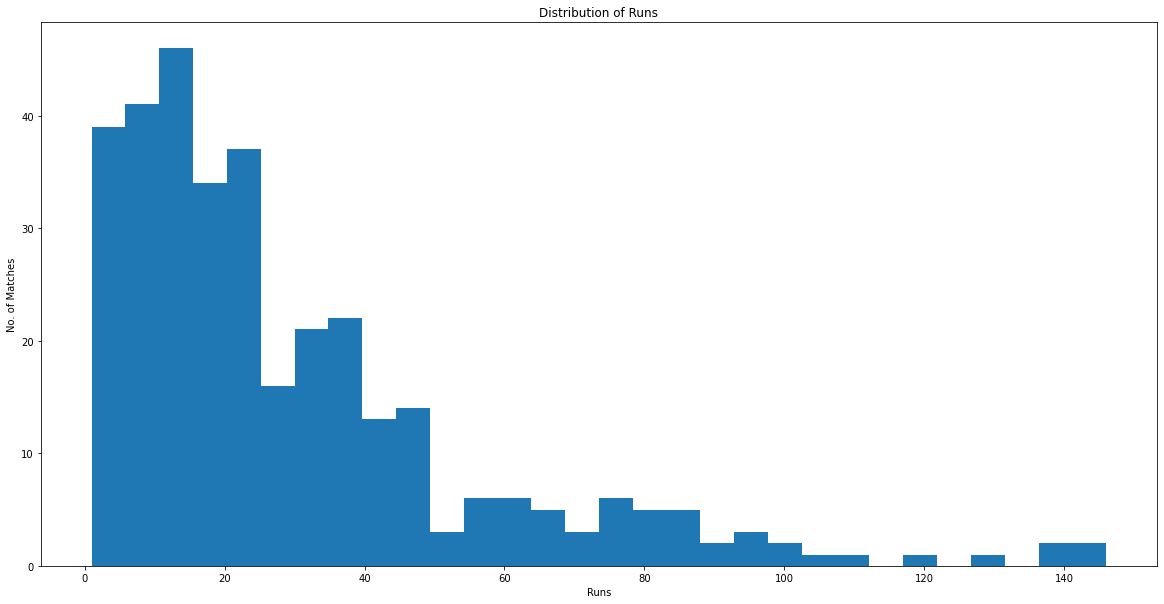

In [305]:
#Distribution of Runs
plt.figure(figsize=(20,10))
plt.hist(batting_first['win_by_runs'],bins=30)
plt.title('Distribution of Runs')
plt.xlabel('Runs')
plt.ylabel('No. of Matches')
plt.show()

In [306]:
second_batting = matches[matches['win_by_wickets']!=0]

In [307]:
second_batting.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


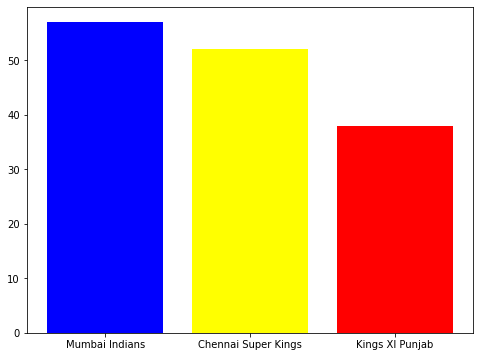

In [308]:
plt.figure(figsize=(8,6))
plt.bar(list(batting_first['winner'].value_counts()[0:3].keys()),list(batting_first['winner'].value_counts()[0:3]), color=['blue','yellow','red'])
plt.show()

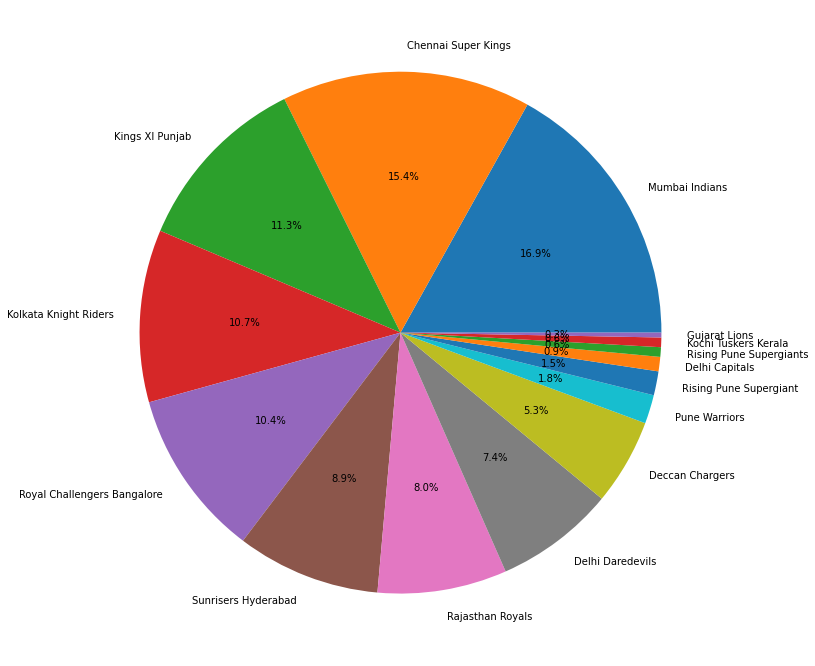

In [309]:
plt.figure(figsize=(24,12))
plt.pie(list(batting_first['winner'].value_counts()),labels=list(batting_first['winner'].value_counts().keys()), autopct='%0.1f%%')
plt.show()

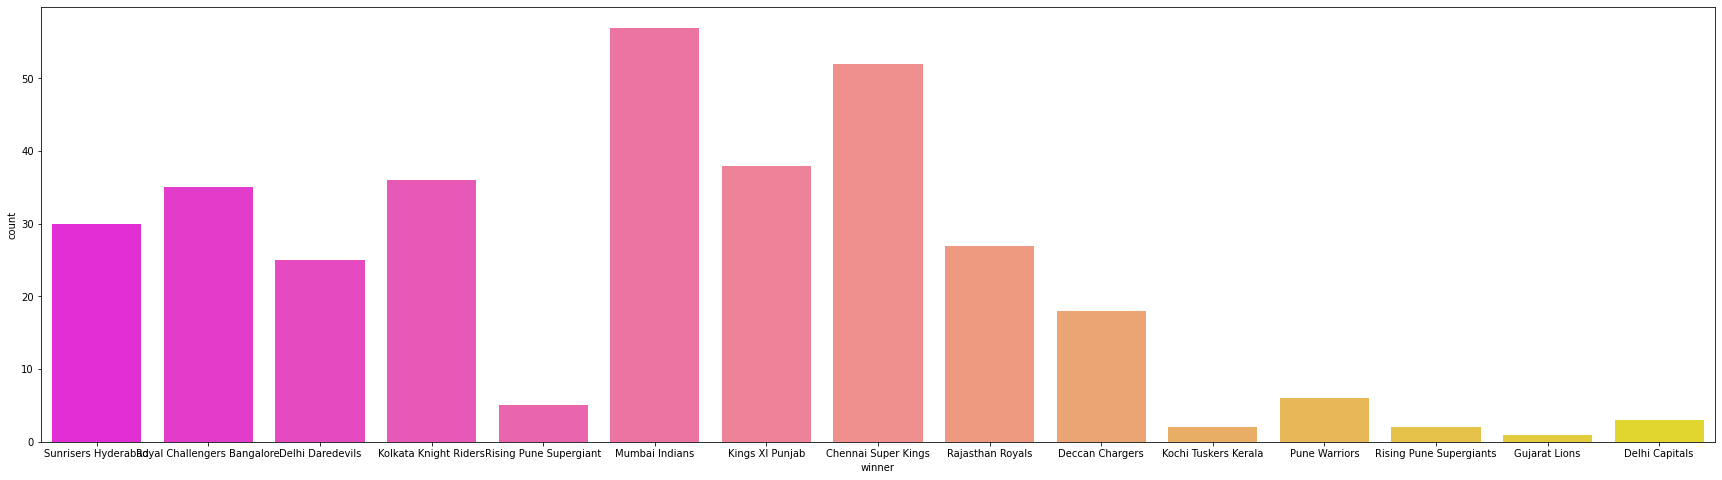

In [310]:
plt.figure(figsize=(30,8))
pen = sns.load_dataset('penguins')
sns.countplot(batting_first['winner'],data=matches,palette='spring');
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [311]:
df = matches[['team1','team2','toss_decision','toss_winner','winner']]


In [312]:
df

,team1,team2,toss_decision,toss_winner,winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,field,Royal Challengers Bangalore,Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiant,field,Rising Pune Supergiant,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders,field,Kolkata Knight Riders,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab,field,Kings XI Punjab,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils,bat,Royal Challengers Bangalore,Royal Challengers Bangalore
...,...,...,...,...,...
751,Kolkata Knight Riders,Mumbai Indians,field,Mumbai Indians,Mumbai Indians
752,Chennai Super Kings,Mumbai Indians,bat,Chennai Super Kings,Mumbai Indians
753,Sunrisers Hyderabad,Delhi Capitals,field,Delhi Capitals,Delhi Capitals
754,Delhi Capitals,Chennai Super Kings,field,Chennai Super Kings,Chennai Super Kings


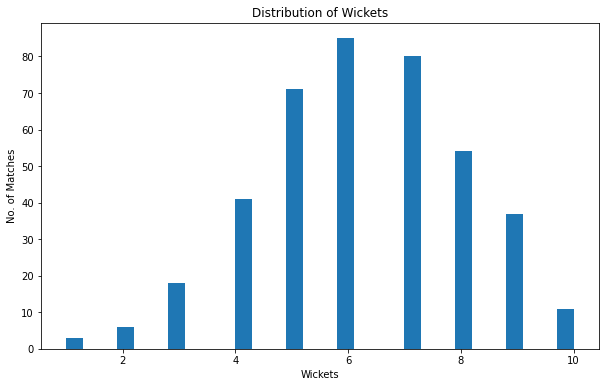

In [313]:
plt.figure(figsize=(10,6))
plt.hist(second_batting['win_by_wickets'],bins=30)
plt.title('Distribution of Wickets')
plt.xlabel('Wickets')
plt.ylabel('No. of Matches')
plt.show()

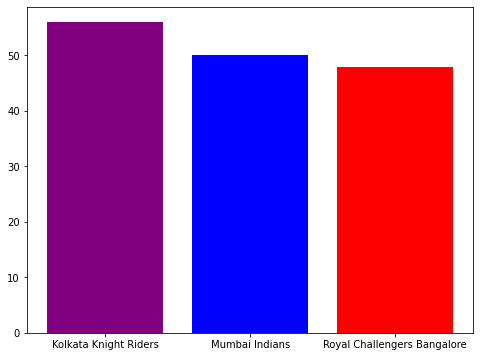

In [314]:
#visualising second batting
plt.figure(figsize=(8,6))
plt.bar(list(second_batting['winner'].value_counts()[0:3].keys()),list(second_batting['winner'].value_counts()[0:3]),color=['purple','blue','red'])
plt.show()

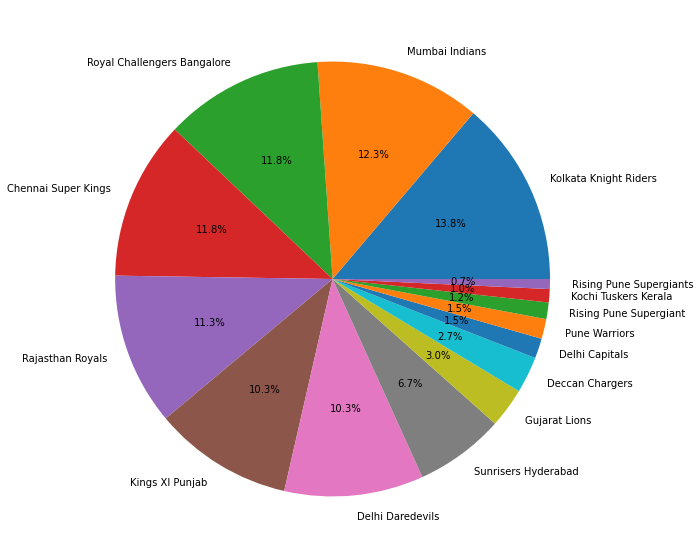

In [315]:
plt.figure(figsize=(18,10))
plt.pie(list(second_batting['winner'].value_counts()),labels=list(second_batting['winner'].value_counts().keys()), autopct='%0.1f%%')
plt.show()

In [316]:
# Number of matches played each season
matches['season'].value_counts()

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

In [317]:
# Number of matches played in each cities
matches['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Dharamsala          9
Indore              9
Johannesburg        8
Ranchi              7
Port Elizabeth      7
Cape Town           7
Cuttack             7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [318]:
# 4's and 6's
four = deliveries[ deliveries["batsman_runs"] == 4]
six = deliveries[ deliveries["batsman_runs"] == 6]

fours_by_batsman = four.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
sixes_by_batsman = six.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()

In [233]:
#Player name of 4's
fours_by_batsman

,match_id,inning,batsman,batsman_runs
0,1,1,DA Warner,2
1,1,1,MC Henriques,3
2,1,1,S Dhawan,5
3,1,1,Yuvraj Singh,7
4,1,2,CH Gayle,2
...,...,...,...,...
6922,11415,1,KA Pollard,3
6923,11415,1,RG Sharma,1
6924,11415,2,F du Plessis,3
6925,11415,2,RA Jadeja,1


<h3>Predicting the Score of a Team</h3>

In [319]:
batsman_grp = deliveries.groupby(['match_id', 'inning', 'batting_team', 'batsman'])
batsmen = batsman_grp['batsman_runs'].sum().reset_index()
batsmen

,match_id,inning,batting_team,batsman,batsman_runs
0,1,1,Sunrisers Hyderabad,BCJ Cutting,16
1,1,1,Sunrisers Hyderabad,DA Warner,14
2,1,1,Sunrisers Hyderabad,DJ Hooda,16
3,1,1,Sunrisers Hyderabad,MC Henriques,52
4,1,1,Sunrisers Hyderabad,S Dhawan,40
...,...,...,...,...,...
11330,11415,2,Chennai Super Kings,MS Dhoni,2
11331,11415,2,Chennai Super Kings,RA Jadeja,9
11332,11415,2,Chennai Super Kings,SK Raina,9
11333,11415,2,Chennai Super Kings,SN Thakur,2


In [320]:
#the wide balls not taken.
balls_faced = deliveries[deliveries["wide_runs"] == 0]
balls_faced = balls_faced.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
balls_faced.columns = ["match_id", "inning", "batsman", "balls_faced"]
batsmen = batsmen.merge(balls_faced, left_on=["match_id", "inning", "batsman"],right_on=["match_id", "inning", "batsman"], how="left")
batsmen

,match_id,inning,batting_team,batsman,batsman_runs,balls_faced
0,1,1,Sunrisers Hyderabad,BCJ Cutting,16,6.0
1,1,1,Sunrisers Hyderabad,DA Warner,14,8.0
2,1,1,Sunrisers Hyderabad,DJ Hooda,16,12.0
3,1,1,Sunrisers Hyderabad,MC Henriques,52,37.0
4,1,1,Sunrisers Hyderabad,S Dhawan,40,31.0
...,...,...,...,...,...,...
11330,11415,2,Chennai Super Kings,MS Dhoni,2,8.0
11331,11415,2,Chennai Super Kings,RA Jadeja,9,5.0
11332,11415,2,Chennai Super Kings,SK Raina,9,14.0
11333,11415,2,Chennai Super Kings,SN Thakur,2,2.0


In [321]:
four = deliveries[ deliveries["batsman_runs"] == 4]
six = deliveries[ deliveries["batsman_runs"] == 6]

fours_by_batsman = four.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
sixes_by_batsman = six.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()

In [323]:
fours_by_batsman

,match_id,inning,batsman,batsman_runs
0,1,1,DA Warner,2
1,1,1,MC Henriques,3
2,1,1,S Dhawan,5
3,1,1,Yuvraj Singh,7
4,1,2,CH Gayle,2
...,...,...,...,...
6922,11415,1,KA Pollard,3
6923,11415,1,RG Sharma,1
6924,11415,2,F du Plessis,3
6925,11415,2,RA Jadeja,1


In [324]:
fours_by_batsman.columns = ["match_id", "inning", "batsman", "4s"]
sixes_by_batsman.columns = ["match_id", "inning", "batsman", "6s"]

In [325]:
batsmen = batsmen.merge(fours_by_batsman, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen = batsmen.merge(sixes_by_batsman, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen['SR'] = np.round(batsmen['batsman_runs'] / batsmen['balls_faced'] * 100, 2)

In [326]:
batsmen

,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,4s,6s,SR
0,1,1,Sunrisers Hyderabad,BCJ Cutting,16,6.0,NaN,2.0,266.67
1,1,1,Sunrisers Hyderabad,DA Warner,14,8.0,2.0,1.0,175.00
2,1,1,Sunrisers Hyderabad,DJ Hooda,16,12.0,NaN,1.0,133.33
3,1,1,Sunrisers Hyderabad,MC Henriques,52,37.0,3.0,2.0,140.54
4,1,1,Sunrisers Hyderabad,S Dhawan,40,31.0,5.0,NaN,129.03
...,...,...,...,...,...,...,...,...,...
11330,11415,2,Chennai Super Kings,MS Dhoni,2,8.0,NaN,NaN,25.00
11331,11415,2,Chennai Super Kings,RA Jadeja,9,5.0,1.0,NaN,180.00
11332,11415,2,Chennai Super Kings,SK Raina,9,14.0,NaN,NaN,64.29
11333,11415,2,Chennai Super Kings,SN Thakur,2,2.0,NaN,NaN,100.00


In [327]:
#fill na in "batsman_runs, "4s", "6s", "SR"
na_cols = ["batsman_runs", "4s", "6s", "SR"]
for col in na_cols:
    batsmen[col] = batsmen[col].fillna(0)

In [255]:
batsmen

,match_id,inning,batting_team,batsman,batsman_runs_x,balls_faced_x,balls_faced_y,batsman_runs_y,batsman_runs,4s_x,...,4s_y,6s_y,4s_x,6s_x,4s_y,6s_y,balls_faced,4s,6s,SR
0,1,1,Sunrisers Hyderabad,BCJ Cutting,16,6.0,6.0,NaN,2.0,NaN,...,NaN,2.0,NaN,2.0,NaN,2.0,6.0,0.0,2.0,33.33
1,1,1,Sunrisers Hyderabad,DA Warner,14,8.0,8.0,2.0,1.0,2.0,...,2.0,1.0,2.0,1.0,2.0,1.0,8.0,2.0,1.0,12.50
2,1,1,Sunrisers Hyderabad,DJ Hooda,16,12.0,12.0,NaN,1.0,NaN,...,NaN,1.0,NaN,1.0,NaN,1.0,12.0,0.0,1.0,8.33
3,1,1,Sunrisers Hyderabad,MC Henriques,52,37.0,37.0,3.0,2.0,3.0,...,3.0,2.0,3.0,2.0,3.0,2.0,37.0,3.0,2.0,5.41
4,1,1,Sunrisers Hyderabad,S Dhawan,40,31.0,31.0,5.0,0.0,5.0,...,5.0,NaN,5.0,NaN,5.0,NaN,31.0,5.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11330,11415,2,Chennai Super Kings,MS Dhoni,2,8.0,8.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,0.0,0.0,0.00
11331,11415,2,Chennai Super Kings,RA Jadeja,9,5.0,5.0,1.0,0.0,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,5.0,1.0,0.0,0.00
11332,11415,2,Chennai Super Kings,SK Raina,9,14.0,14.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,0.0,0.0,0.00
11333,11415,2,Chennai Super Kings,SN Thakur,2,2.0,2.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,0.00


In [328]:
#score by team
team_score = batsmen[batsmen['batting_team'] == "Mumbai Indians"].reset_index()
team_score

,index,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,4s,6s,SR
0,17,2,1,Mumbai Indians,AT Rayudu,10,12.0,0.0,0.0,83.33
1,18,2,1,Mumbai Indians,HH Pandya,35,15.0,1.0,4.0,233.33
2,19,2,1,Mumbai Indians,JC Buttler,38,19.0,3.0,3.0,200.00
3,20,2,1,Mumbai Indians,KA Pollard,27,17.0,3.0,1.0,158.82
4,21,2,1,Mumbai Indians,KH Pandya,3,5.0,0.0,0.0,60.00
...,...,...,...,...,...,...,...,...,...,...
1411,11322,11415,1,Mumbai Indians,KH Pandya,7,7.0,0.0,0.0,100.00
1412,11323,11415,1,Mumbai Indians,MJ McClenaghan,0,2.0,0.0,0.0,0.00
1413,11324,11415,1,Mumbai Indians,Q de Kock,30,17.0,0.0,4.0,176.47
1414,11325,11415,1,Mumbai Indians,RD Chahar,0,2.0,0.0,0.0,0.00


In [329]:
scores = team_score.groupby(['match_id'])['batsman_runs'].sum().reset_index()
scores

,match_id,batsman_runs
0,2,176
1,7,168
2,10,155
3,12,132
4,16,164
...,...,...
182,11338,198
183,11342,171
184,11347,134
185,11412,132


In [330]:
from sklearn.preprocessing import LabelEncoder

ftr_list = ['batsman']
encoder = LabelEncoder()
for ftr in ftr_list:
    team_score[ftr] = encoder.fit_transform(team_score[ftr])
    print(encoder.classes_)

team_score

['A Dananjaya' 'A Joseph' 'A Nehra' 'A Symonds' 'AC Blizzard' 'AG Murtaza'
 'AJ Finch' 'AM Nayar' 'AM Rahane' 'AN Ahmed' 'AP Tare' 'AS Yadav'
 'AT Rayudu' 'BB Sran' 'BCJ Cutting' 'BR Dunk' 'C Madan' 'C Nanda'
 'CJ Anderson' 'CJ McKay' 'CM Gautam' 'CRD Fernando' 'DJ Bravo'
 'DJ Jacobs' 'DJ Thornely' 'DR Smith' 'DS Kulkarni' 'E Lewis' 'GJ Maxwell'
 'GR Napier' 'HH Gibbs' 'HH Pandya' 'Harbhajan Singh' 'Ishan Kishan'
 'J Suchith' 'JC Buttler' 'JEC Franklin' 'JJ Bumrah' 'JP Duminy'
 'KA Pollard' 'KD Karthik' 'KH Pandya' 'KV Sharma' 'L Ronchi'
 'LMP Simmons' 'M Markande' 'M de Lange' 'MA Khote' 'MEK Hussey'
 'MG Johnson' 'MJ Guptill' 'MJ McClenaghan' 'MK Pandey' 'MM Patel'
 'Mohammad Ashraful' 'Mustafizur Rahman' 'N Rana' 'NLTC Perera'
 'NM Coulter-Nile' 'P Kumar' 'PA Patel' 'PJ Sangwan' 'PP Ojha' 'PR Shah'
 'Q de Kock' 'R Dhawan' 'R McLaren' 'R Salam' 'R Sathish' 'R Vinay Kumar'
 'RD Chahar' 'RE Levi' 'RG Sharma' 'RJ Peterson' 'RP Singh' 'RR Raje'
 'RT Ponting' 'RV Uthappa' 'S Dhawan' 'S Go

,index,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,4s,6s,SR
0,17,2,1,Mumbai Indians,12,10,12.0,0.0,0.0,83.33
1,18,2,1,Mumbai Indians,31,35,15.0,1.0,4.0,233.33
2,19,2,1,Mumbai Indians,35,38,19.0,3.0,3.0,200.00
3,20,2,1,Mumbai Indians,39,27,17.0,3.0,1.0,158.82
4,21,2,1,Mumbai Indians,41,3,5.0,0.0,0.0,60.00
...,...,...,...,...,...,...,...,...,...,...
1411,11322,11415,1,Mumbai Indians,41,7,7.0,0.0,0.0,100.00
1412,11323,11415,1,Mumbai Indians,51,0,2.0,0.0,0.0,0.00
1413,11324,11415,1,Mumbai Indians,64,30,17.0,0.0,4.0,176.47
1414,11325,11415,1,Mumbai Indians,70,0,2.0,0.0,0.0,0.00


In [331]:
team_score = team_score.drop(['index', 'match_id', 'inning', 'batting_team'], axis=1)

In [332]:
team_score = team_score.dropna()

In [333]:
team_score.dropna()

,batsman,batsman_runs,balls_faced,4s,6s,SR
0,12,10,12.0,0.0,0.0,83.33
1,31,35,15.0,1.0,4.0,233.33
2,35,38,19.0,3.0,3.0,200.00
3,39,27,17.0,3.0,1.0,158.82
4,41,3,5.0,0.0,0.0,60.00
...,...,...,...,...,...,...
1411,41,7,7.0,0.0,0.0,100.00
1412,51,0,2.0,0.0,0.0,0.00
1413,64,30,17.0,0.0,4.0,176.47
1414,70,0,2.0,0.0,0.0,0.00


In [334]:
team_score.isnull().sum()

batsman         0
batsman_runs    0
balls_faced     0
4s              0
6s              0
SR              0
dtype: int64

<h3>Regression to predict Batsmen Scores</h3>

In [335]:
from sklearn.metrics import mean_squared_error

# RMSE for testing data

def rmse_model(model, x_test, y_test):
    predictions = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(predictions, y_test))
    return(rmse)

In [336]:
from sklearn.model_selection import train_test_split

x = team_score[['batsman', 'balls_faced', '4s', '6s', 'SR']]
y = team_score[['batsman_runs']]

x_model, x_test, y_model, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_model, y_model, test_size=0.2, random_state=1)

In [337]:
print(f'Original data: {x.shape}')
print(f'Training data: {x_train.shape}')
print(f'Testing data: {x_test.shape}')
print(f'Validation data: {x_val.shape}')

Original data: (1415, 5)
Training data: (905, 5)
Testing data: (283, 5)
Validation data: (227, 5)


<h3>Linear regression</h3>


In [338]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(x_train, y_train)

print(f'LR_RMSE Score: {rmse_model(model1, x_test, y_test)}')
print(f'LR_odel Coefficients: {model1.coef_}')
print(f'LR_Intercept Values of the Model: {model1.intercept_}')

LR_RMSE Score: 2.702396555140559
LR_odel Coefficients: [[-4.77938532e-03  7.37868708e-01  2.85919108e+00  4.90604858e+00
   2.11352142e-02]]
LR_Intercept Values of the Model: [-2.57274002]


In [339]:
LR_y_pred = model1.predict(x_test)

In [340]:
print(f'LR_Prediction Value of the Model: {LR_y_pred}')

LR_Prediction Value of the Model: [[ 1.19927516e+01]
 [ 4.06929509e+01]
 [ 4.72200394e+01]
 [ 1.32901485e+00]
 [ 3.87972266e+01]
 [ 4.48860105e+01]
 [ 9.06310564e-01]
 [ 3.75422225e+01]
 [ 9.61244026e+00]
 [ 1.37100087e+01]
 [ 2.80951535e+00]
 [ 5.84582388e+01]
 [ 1.10264650e+01]
 [-1.98303226e+00]
 [ 2.96919018e+01]
 [ 5.16505129e+00]
 [ 5.71854916e+01]
 [ 1.05915304e+01]
 [ 3.43280757e+01]
 [ 2.14362366e+01]
 [ 4.97056454e+00]
 [ 6.93684297e+00]
 [ 2.06039808e+01]
 [ 6.59060885e+00]
 [ 7.09049413e+01]
 [ 1.76595825e+01]
 [ 2.50602965e-02]
 [ 1.21309293e+01]
 [ 3.47109198e+01]
 [ 2.74494436e+01]
 [ 2.02517961e+00]
 [ 1.20671769e+01]
 [ 1.89696448e+00]
 [-1.38376573e+00]
 [ 3.53131535e+01]
 [ 1.56242566e+01]
 [ 1.66439892e+01]
 [ 7.37868109e+00]
 [ 4.64409399e+00]
 [ 1.38459425e+01]
 [ 3.14854472e+01]
 [ 1.57045120e+01]
 [ 1.85538663e+01]
 [ 2.66249485e+01]
 [ 3.10845443e+01]
 [ 7.74759102e+00]
 [ 2.80796027e+01]
 [ 2.34224221e+01]
 [-4.16486522e-01]
 [ 2.16781009e+01]
 [ 3.35433576e+0

<h3>Random Forest</h3>


In [341]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

model2 = RandomForestRegressor()
model2.fit(x_train,y_train.values.ravel() )

print(f'RF_RMSE Score: {rmse_model(model2, x_test, y_test)}')

RF_RMSE Score: 1.5953076068345027


In [342]:
RF_y_pred = model2.predict(x_test)

In [344]:
print(f'RF_Prediction Value of the Model: {RF_y_pred}')

RF_Prediction Value of the Model: [9.400e+00 2.952e+01 3.753e+01 1.000e+00 3.647e+01 4.795e+01 1.000e-02
 3.687e+01 1.120e+01 1.500e+01 3.970e+00 5.486e+01 8.230e+00 0.000e+00
 3.193e+01 4.140e+00 5.487e+01 8.900e+00 3.581e+01 1.669e+01 1.750e+00
 7.890e+00 1.936e+01 6.250e+00 6.879e+01 1.931e+01 0.000e+00 1.467e+01
 3.203e+01 2.397e+01 1.010e+00 7.670e+00 3.040e+00 0.000e+00 3.355e+01
 1.803e+01 1.404e+01 8.150e+00 3.760e+00 1.175e+01 3.251e+01 7.730e+00
 1.339e+01 2.708e+01 2.723e+01 8.550e+00 3.419e+01 2.092e+01 0.000e+00
 1.714e+01 3.551e+01 1.036e+01 1.786e+01 1.475e+01 1.940e+00 7.340e+00
 6.670e+00 6.544e+01 3.323e+01 1.010e+00 6.600e+00 1.467e+01 0.000e+00
 7.490e+00 3.897e+01 2.157e+01 7.178e+01 2.940e+00 1.855e+01 9.830e+00
 5.855e+01 0.000e+00 8.900e+00 1.914e+01 4.560e+00 4.030e+00 6.940e+00
 1.595e+01 1.000e+00 7.607e+01 2.385e+01 2.020e+00 2.020e+00 3.890e+01
 3.020e+00 9.470e+00 1.000e+00 6.504e+01 4.397e+01 6.825e+01 3.568e+01
 2.000e+00 7.350e+00 2.991e+01 0.000e+00 2.